<a href="https://colab.research.google.com/github/JuniorSteve770/PYTHON/blob/main/Projet_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importation des librairies

import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

#- La Collecte de données se fera via A.P.I parce que nous travaillons sur plusieurs actifs (variables) et en finance la vitesse de transmition est un facteur essentiel
#- la Librairie datetime nous permet de palier au probleme de format de date differents.

**PREMIERE PARTIE**

In [ ]:
#******* Premiere Importationde des données*******#

assets = ["AMZN","META","MSFT","GOOG","TSLA","NVDA"]
start = dt.datetime.today() - dt.timedelta(5840)
end = dt.datetime.today()

# Assets correspond aux actifsdont nous souhaitons importer les modalités et paramettres.
# start et end renvoient a la periode en jours (2920 jours en arriere a compter d'hier)
# le choix de 5840 correspond a 16 ans de données, ce qui vas nous permettre de bien observé l'evolution de nos actifs, et nous permet aussi d'avoir les NAN dans le jeux de données
# plus bas, nous allons refaire une seconde importation avec une raison differente

# Boucle pour lire les differentes modalités de chacunes de nos variables ou actifs financier et stocker dans l'objet price
for price in assets:
    price = yf.download(price,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Propriétés et Carracteriqtiques de Price (le type DataFrame core, Période de 16 ans allant de 2007 a la date d'hier, le Nombres de colonnes et leurs propriétés)
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4025 entries, 2007-04-20 to 2023-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4025 non-null   float64
 1   High       4025 non-null   float64
 2   Low        4025 non-null   float64
 3   Close      4025 non-null   float64
 4   Adj Close  4025 non-null   float64
 5   Volume     4025 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 220.1 KB


In [ ]:
# Affichage de la DataFrame (Head, Tail) Uniquement avec les Prix de clotures des actifs (variables)
p_close.head()

# On remarque la Presence des NAN pour les Actifs TESLA et META qui en 2007 etaient pas encore cotés a la Bourse

,AMZN,META,MSFT,GOOG,TSLA,NVDA
Date,,,,,,
2007-04-20,2.2475,NaN,29.020000,12.016957,NaN,5.315000
2007-04-23,2.2385,NaN,28.780001,11.932275,NaN,5.228333
2007-04-24,2.2375,NaN,28.790001,11.893670,NaN,5.425000
2007-04-25,2.8405,NaN,28.990000,11.905127,NaN,5.518333
2007-04-26,3.1390,NaN,29.100000,11.984579,NaN,5.586667


In [ ]:
# Affichage de la DataFrame (Head, Tail) Uniquement avec les Prix de clotures des actifs (variables)
p_close.tail()

# On remarque également que les valeurs du tails de chacunes des variables sont plus élevés par rapports aux valeurs du Head: (croissance)

,AMZN,META,MSFT,GOOG,TSLA,NVDA
Date,,,,,,
2023-04-10,102.169998,214.750000,289.390015,106.949997,184.509995,275.790009
2023-04-11,99.919998,213.850006,282.829987,106.120003,186.789993,271.690002
2023-04-12,97.830002,214.000000,283.489990,105.220001,180.539993,264.950012
2023-04-13,102.400002,220.350006,289.839996,108.190002,185.899994,264.630005
2023-04-14,102.510002,221.490005,286.140015,109.459999,185.000000,267.579987


In [ ]:
# Estimation de la quantité de valeurs manquantes sur chaques variables de toute la dataframe
p_close.isnull().sum()

# 1282 valeurs Manquantes(NAN) pour META
# 805 valeurs Manquantes(NAN) pour TESLA

AMZN       0
META    1281
MSFT       0
GOOG       0
TSLA     804
NVDA       0
dtype: int64

In [ ]:
# Remplacement des NAN (Nous avons 3 méthodes pour le)

#----------# remplacer tous les NAN par la premiere valeur non NAN avec la synthaxe:
           #p_close[price].fillna(method='bfill')

#----------# supprimmer les lignes ou colones qui contienent les NAN
           #p_close[price].dropna(axis = 0, how = 'any')

#----------# Remplacer les NAN par zero(0) car il n'aura aucun effet sur les données et calculs.
           # une première synthaxe est : new var = np.where(np.isnan(old_var), 0, old_var)

# CONCATENATION  et affichage de la dataFrame sur lequel nous avons remplacer les NAN par Zero (NAN = 0)
close_p = p_close.fillna(0)
close_p.head()

,AMZN,META,MSFT,GOOG,TSLA,NVDA
Date,,,,,,
2007-04-20,2.2475,0.0,29.020000,12.016957,0.0,5.315000
2007-04-23,2.2385,0.0,28.780001,11.932275,0.0,5.228333
2007-04-24,2.2375,0.0,28.790001,11.893670,0.0,5.425000
2007-04-25,2.8405,0.0,28.990000,11.905127,0.0,5.518333
2007-04-26,3.1390,0.0,29.100000,11.984579,0.0,5.586667


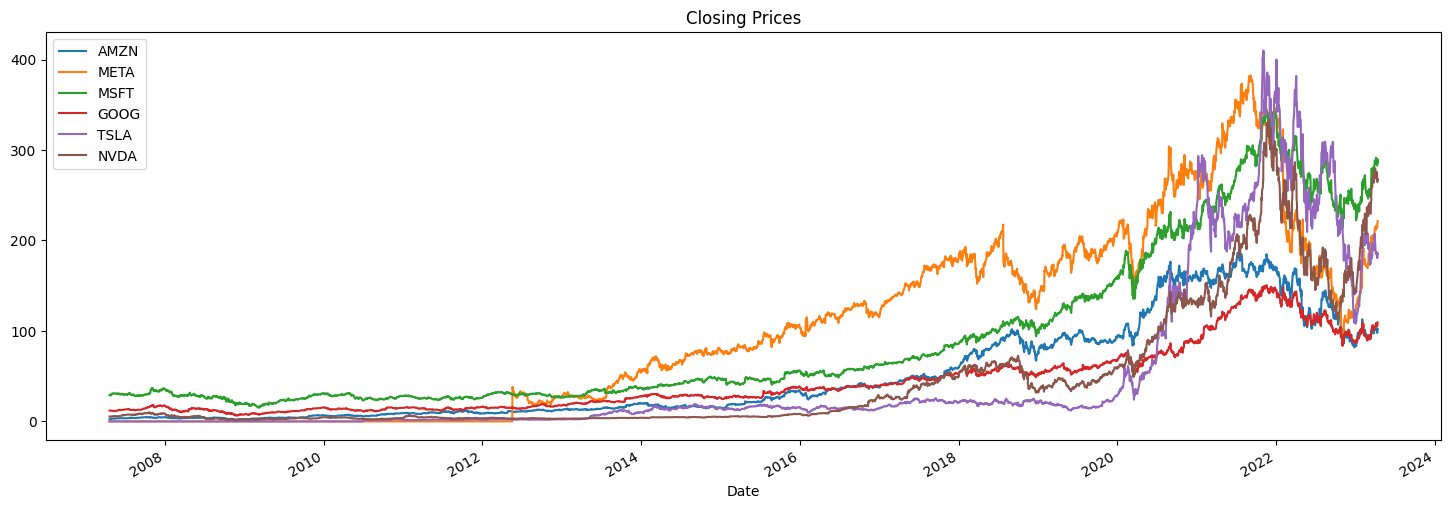

In [ ]:
# premier Plot de la Tendance sur une periode allant de 2007 a  hier (16 ans)

close_p['AMZN'].plot(label= 'AMZN', figsize=(18,6), title = 'Closing Prices')
close_p['META'].plot(label= 'META')
close_p['MSFT'].plot(label= 'MSFT')
close_p['GOOG'].plot(label= 'GOOG')
close_p['TSLA'].plot(label= 'TSLA')
close_p['NVDA'].plot(label= 'NVDA')
plt.legend();
# Une Interprétation du graphique ci-dessus est la suivante :
#-	Depuis 2012, tous ces actifs connaissent une croissance avec des prix qui évoluent significativement à la hausse.
#-	De 2020 à nos jours, les prix se chevauchent entre eux et atteint de nouveau points hauts ou points bas
#-	L’actif avec la plus grande variation et prix le plus haut est Tesla de couleur AMETHYSE
# on note egalement certains effets systemique tel que 2019 avec l'effet covid se resssent sur les graphiques

**DEUXIEME PARTIE**
- la presence des valeurs NaN ou zéro n'es pas favorable a l'etude de la volumetrie des Actifs.
- nous avons donc selectionner un intervalle de temps relatif a l'evolution de l'economie et une periode où tous nos actifs sont en activités.

In [ ]:
#******* Seconde Importationde des données *******#

assets = ["AMZN","META","MSFT","GOOG","TSLA","NVDA"]
start = dt.datetime.today() - dt.timedelta(2920)
end = dt.datetime.today()

# Assets correspond aux actifsdont nous souhaitons importer les paramettres.
# start et end renvoient a la periode en jours (2920 jours en arriere a compter d'hier)
# le choix de 2920 renvoi a 2 mandats presidentiel qui renvoit a la durée de 2 cycles economiques au USA
# les cycles economiques dependent de la politique economique instorer par le pouvoir en place.

# Boucle pour lire les differentes modalités de chacunes de nos variables ou actifs financier et stocker dans price
for price in assets:
    price = yf.download(price,start,end)

# Creation de la Dataframe qui vas stocker le volume des differents actifs
p_volume = pd.DataFrame()

# Creation et affichage de la Dataframe qui vas stocker les modalités (prix) des differentes variables (actifs)
p2_close = pd.DataFrame()

# Boucle qui permet d'enregistrer la modalité prix de tout les differentes variables
for price in assets:
    p2_close[price] = yf.download(price,start,end)["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Affichage des Valeurs Unique de Notre Dataframe, ce qui nous permet de controller aussi la presence des NAN
p2_close[price].unique()

# Certe il ya des valeurs Unique. et nous remarquons l'abscence des NAN dans nos donnée

array([  5.52250004,   5.51499987,   5.57749987, ..., 271.69000244,
       264.63000488, 267.57998657])

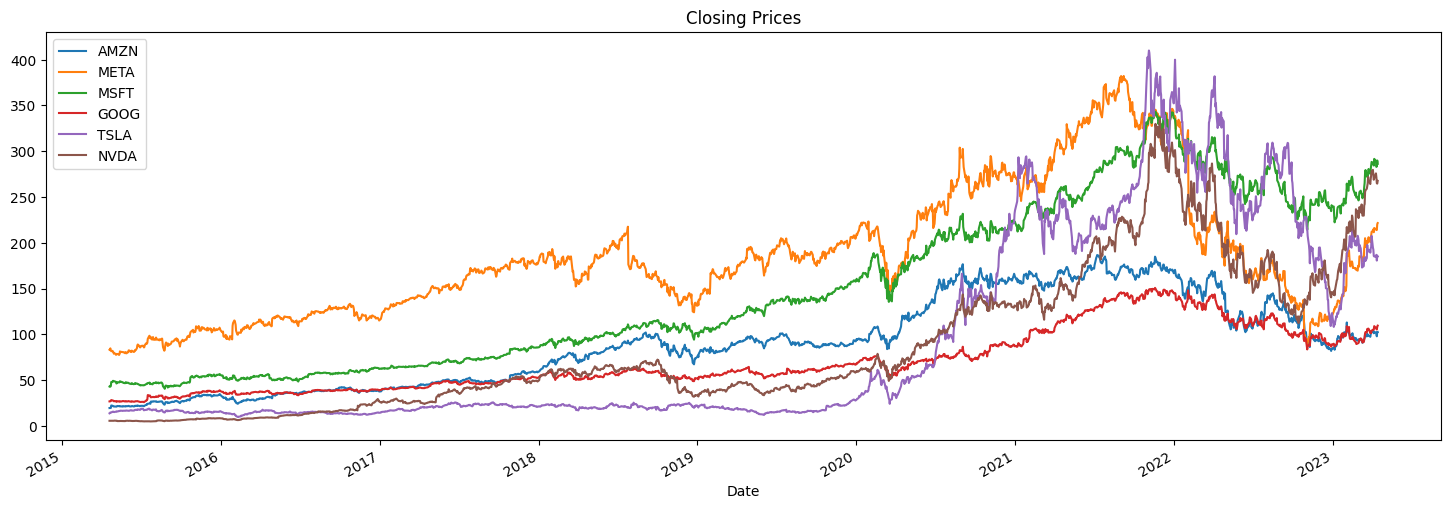

In [ ]:
#Second Plot de la Tendance sur une periode de 8 ans ( allant de 2015 a  hier )

p2_close['AMZN'].plot(label= 'AMZN', figsize=(18,6), title = 'Closing Prices')
p2_close['META'].plot(label= 'META')
p2_close['MSFT'].plot(label= 'MSFT')
p2_close['GOOG'].plot(label= 'GOOG')
p2_close['TSLA'].plot(label= 'TSLA')
p2_close['NVDA'].plot(label= 'NVDA')
plt.legend();

# Une Interprétation du graphique ci-dessus est la suivante :
#-	de 2015 a 2018, tous ces actifs connaissent une croissance avec des prix qui évoluent progressivement à la hausse
# (exemple de Meta qui quitte de 90$ en 2015 a plus de 200$ en 2018).
# entre fin 2018 et 2019, tous nos actifs font une chutte vers le bas (probablement l'effet Covid 19)
# le meme scénario se repette durant le premier trimestre de 2020 ou  tous nos aactifs chuttent vers le bas, ainsi qu'en 2022-2023
#-	depuis le debut 2023 a nos jours, les prix repartent a la hausse.
#-	L’actif avec la plus grande variation et prix le plus haut est Tesla de couleur AMETHYSE, dont le prix quitte de 40$ a pres de 400$ entre 2020 et 2022

In [ ]:
# Boucle qui permet d'enregistrer le volume de chaque actif dans une dataFrame
for price in assets:
    p_volume[price] = yf.download(price,start,end)["Volume"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#Affichage des premieres valeurs
p_volume.head()

,AMZN,META,MSFT,GOOG,TSLA,NVDA
Date,,,,,,
2015-04-20,100322000,28796800,46057700,33585958,38389500,23162400
2015-04-21,92870000,27171900,26013800,36895018,51487500,23045600
2015-04-22,69494000,45548000,25064300,31871263,117945000,20742000
2015-04-23,159600000,73728100,46309500,83697161,66168000,25938000
2015-04-24,343538000,29660400,130933700,98650102,36417000,24096000


In [ ]:
# On Fait une Concatenation tout en remplacant les NAN si elles existent ou surviennent
cl_volume = p_volume.fillna(0)

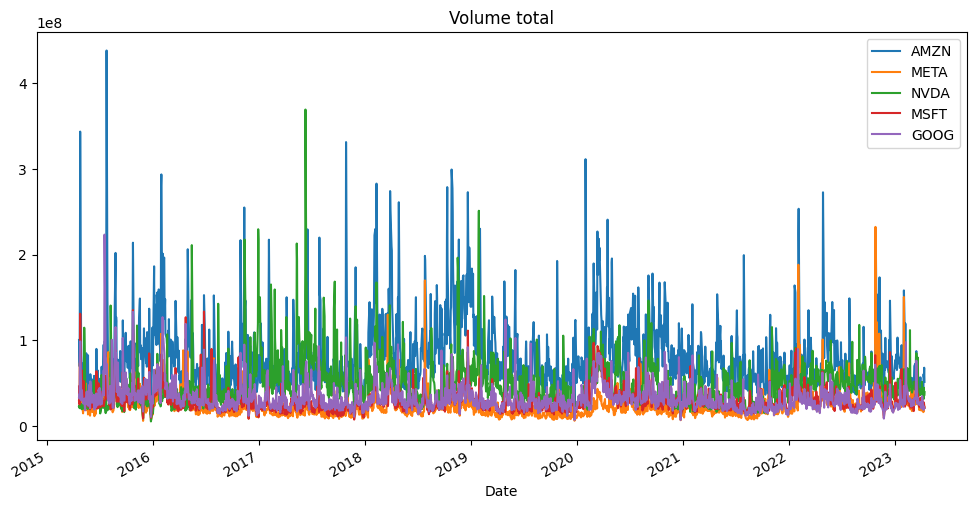

In [ ]:
# On plot le volume de tous nos Actifs (Volume total)

cl_volume['AMZN'].plot(label= 'AMZN', figsize=(12,6), title = 'Volume total')
cl_volume['META'].plot(label= 'META')
cl_volume['NVDA'].plot(label= 'NVDA')
cl_volume['MSFT'].plot(label= 'MSFT')
cl_volume['GOOG'].plot(label= 'GOOG')
#cl_volume['TSLA'].plot(label= 'TSLA')
plt.legend();
# Ce plot de volumetrie nous montre que TESLA possede de tres grand niveaux de volatilité

-	Nous avons refait un deuxième plot de volumétrie en retirant l’actif Tesla, et nous remarquons que Amazon est le 2é avec la plus haute volatilité

- Nous avons progressivement répété le procédé. Ce qui nous a permis de classer nos actifs en deux catégories (ceux à forte volatilité, ceux à moyenne et basse volatilité) Modélisation et Prédiction


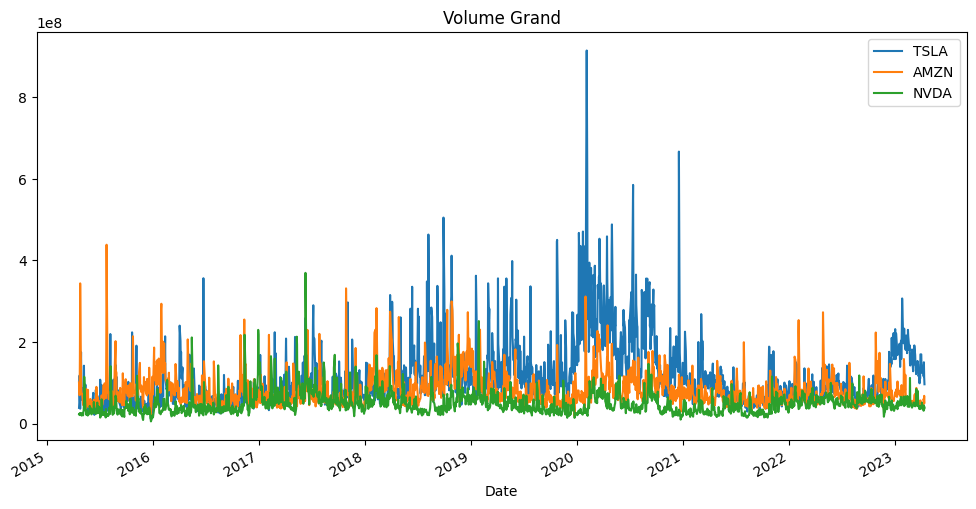

In [ ]:
# Plot des Actifs les plus volatile

cl_volume['TSLA'].plot(label= 'TSLA',figsize=(12,6), title = 'Volume Grand')
cl_volume['AMZN'].plot(label= 'AMZN')
cl_volume['NVDA'].plot(label= 'NVDA')
plt.legend();

# on se rend compte que, Tesla possede les plus grands niveaux de volatilités, suivi par Amazone et enfin Nvidia.

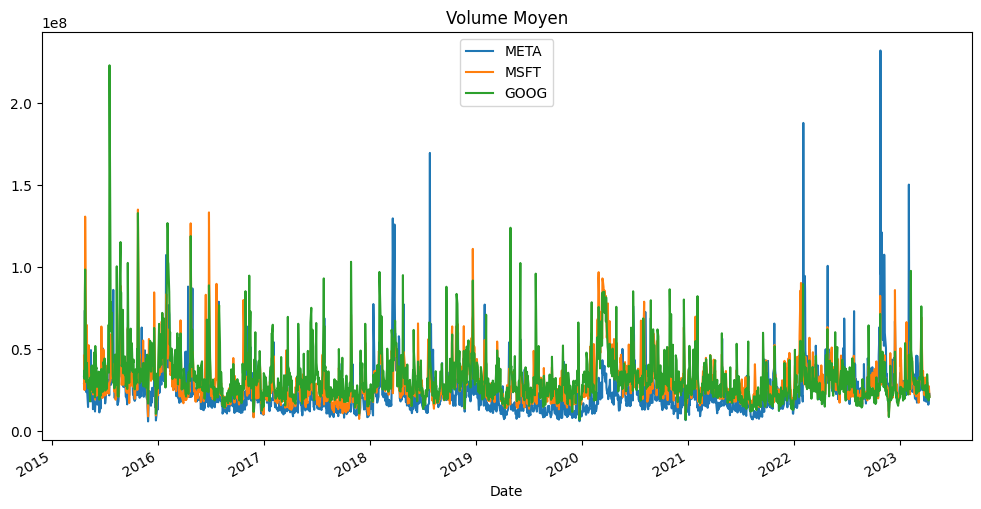

In [ ]:
# Plot des Actifs les moins volatile

cl_volume['META'].plot(label= 'META', figsize=(12,6), title = 'Volume Moyen')
cl_volume['MSFT'].plot(label= 'MSFT')
cl_volume['GOOG'].plot(label= 'GOOG')
plt.legend();

# on se rend compte que, Meta possede les plus grands niveaux de volatilités attein en 22023, suivi par Google en 2015 et enfin Microsoft en 2018.

La suite consiste a chercher les jours avec les plus grand Niveaux de Volatité, ainsi que les raisons ou cause a l'origine du pic.

ensuite aller rechercher sur google que sont les evenements responseble de cet activité ?

In [ ]:
# les jours d'occurence
Date_AMZN = p_volume['AMZN'].idxmax()
Date_META = p_volume['META'].idxmax()
Date_NVDA = p_volume['NVDA'].idxmax()
Date_MSFT = p_volume['MSFT'].idxmax()
Date_GOOG = p_volume['GOOG'].idxmax()
Date_TSLA = p_volume['TSLA'].idxmax()

Date_AMZN, Date_META, Date_NVDA, Date_MSFT, Date_GOOG, Date_TSLA

# ci-dessous nous avons les dates auquel nos actifs ont atteint les plus grand pic

(Timestamp('2015-07-24 00:00:00'),
 Timestamp('2022-10-27 00:00:00'),
 Timestamp('2017-06-09 00:00:00'),
 Timestamp('2015-10-23 00:00:00'),
 Timestamp('2015-07-17 00:00:00'),
 Timestamp('2020-02-04 00:00:00'))

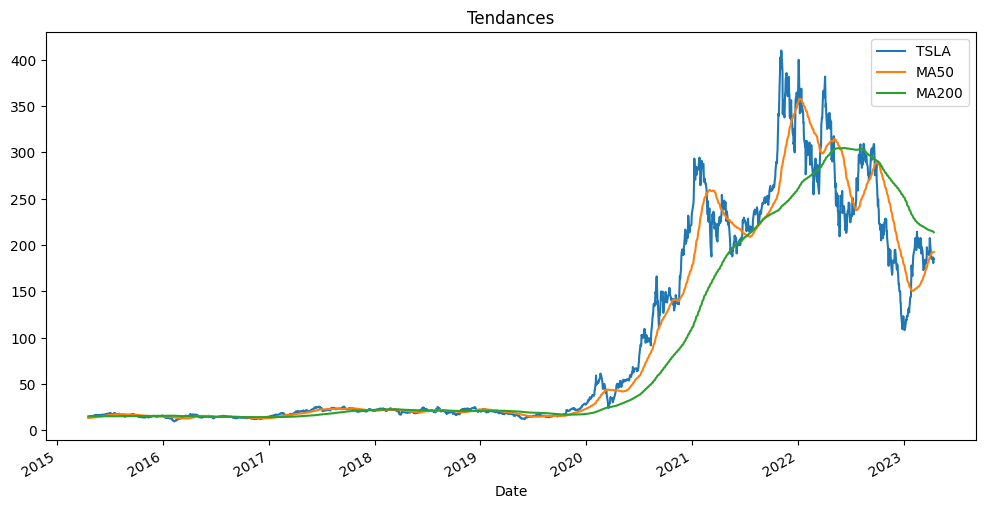

In [ ]:
# plot des Moyennes Mobiles 50 et 200 pour confimer les phases de tendance de nos actifs
p2_close['MA50']=close_p['TSLA'].rolling(50).mean()
p2_close['MA200']=close_p['TSLA'].rolling(200).mean()
p2_close[['TSLA','MA50','MA200']].plot(figsize=(12,6), title = 'Tendances');

In [ ]:
# Etude des Nuages de points et des niveaux de correlation entre nos variables
stock_scatter = pd.concat((p2_close['AMZN'],p2_close['META'],p2_close['NVDA'],p2_close['MSFT'],p2_close['GOOG'],p2_close['TSLA']),axis=1)
stock_scatter.columns = ['AMZ Close','META Close','NVDA Close','MSFT Close','GOOG Close','TSLA Close']

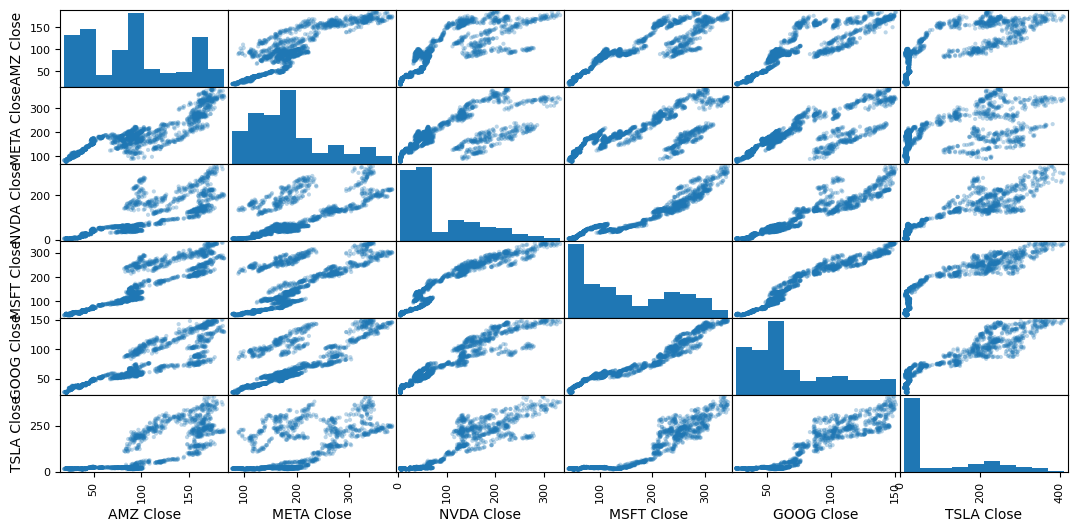

In [ ]:
# Plot du Nuage de points
scatter_matrix(stock_scatter,figsize=(13,6), alpha=0.3);

<Axes: >

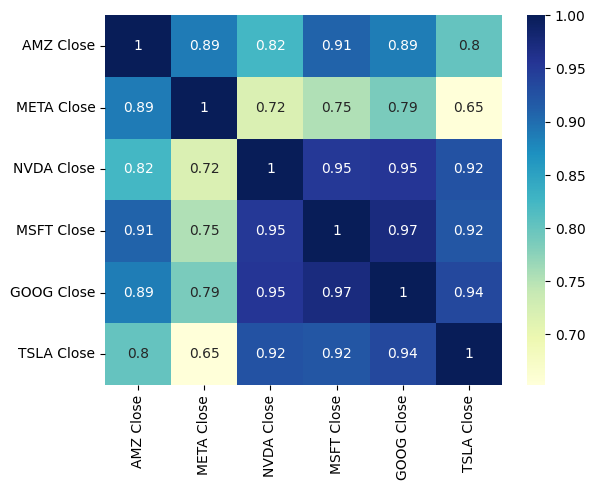

In [ ]:
#Tableau des valeurs de correlation issue du nuage de points

matrx = stock_scatter.corr()
sb.heatmap(matrx,annot=True,cmap="YlGnBu")

rendement a un temps t pour estimer le rendement journalier moyen et qui nous donne aussi la rentabilité pour un investisseur qui achete et revend apres 24h et nous renseigne sur la volatilité journaliere Rt = (Pt/Pt-1)-1

In [ ]:
# Etapes de Calcul du Rendement Moyen
# cree une coleonne pour le rendement de chaque actif
# utiliser la formule et appliqué la methode shift
# on peut aussi utiliser la fonction "pct.change" de pandas

Amaz = (p2_close['AMZN']/p2_close['AMZN'].shift(1))-1
Meta = (p2_close['META']/p2_close['META'].shift(1))-1
Nvidia = (p2_close['NVDA']/p2_close['NVDA'].shift(1))-1
Microsoft = (p2_close['MSFT']/p2_close['MSFT'].shift(1))-1
Google = (p2_close['GOOG']/p2_close['GOOG'].shift(1))-1
Tesla = (p2_close['TSLA']/p2_close['TSLA'].shift(1))-1

Amaz,Meta,Nvidia
# Ce rendement est positif lorque le prix de l’actif coture à la hausse entre 2 jours successif et négatif s’il cloture plutot à la baisse

(Date
 2015-04-20         NaN
 2015-04-21    0.004287
 2015-04-22   -0.003528
 2015-04-23    0.000487
 2015-04-24    0.141311
                 ...   
 2023-04-10    0.001078
 2023-04-11   -0.022022
 2023-04-12   -0.020917
 2023-04-13    0.046714
 2023-04-14    0.001074
 Name: AMZN, Length: 2012, dtype: float64,
 Date
 2015-04-20         NaN
 2015-04-21    0.006379
 2015-04-22    0.012078
 2015-04-23   -0.026232
 2015-04-24   -0.010678
                 ...   
 2023-04-10   -0.006247
 2023-04-11   -0.004191
 2023-04-12    0.000701
 2023-04-13    0.029673
 2023-04-14    0.005174
 Name: META, Length: 2012, dtype: float64,
 Date
 2015-04-20         NaN
 2015-04-21   -0.001358
 2015-04-22    0.011333
 2015-04-23   -0.004034
 2015-04-24   -0.008551
                 ...   
 2023-04-10    0.020047
 2023-04-11   -0.014866
 2023-04-12   -0.024808
 2023-04-13   -0.001208
 2023-04-14    0.011148
 Name: NVDA, Length: 2012, dtype: float64)

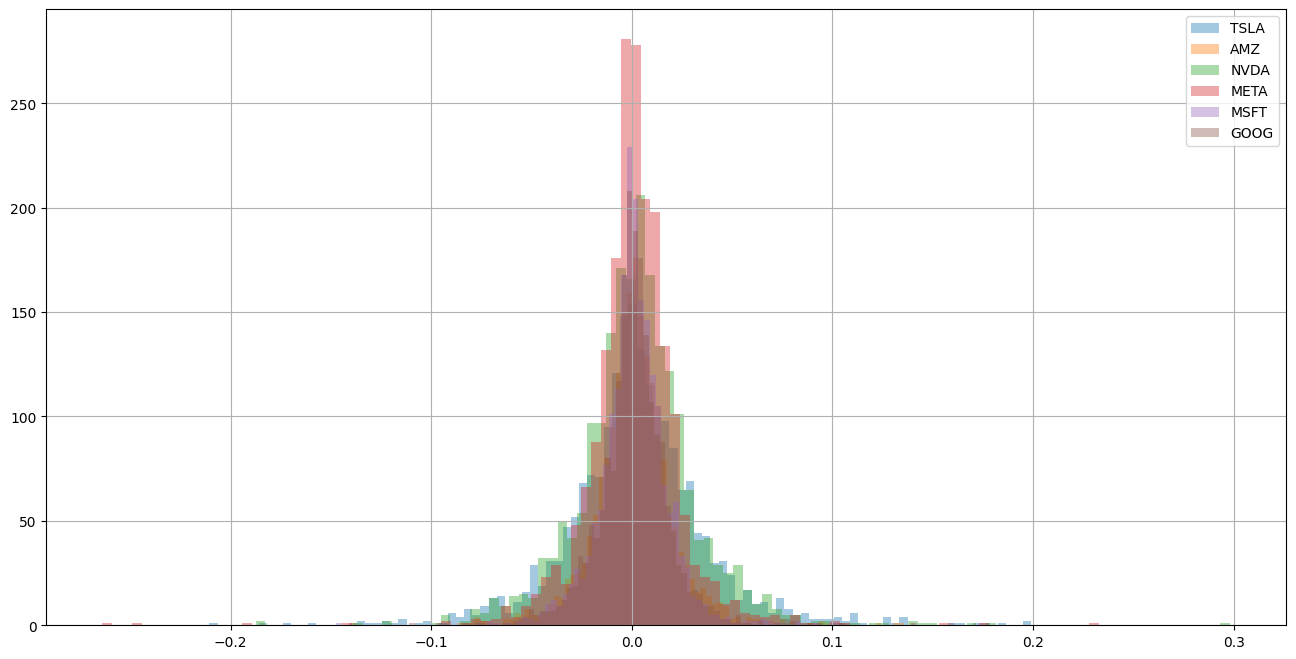

In [ ]:
# Plot du rendement Moyen positif ou Negatif de nos Actifs sur un Histogramme

Tesla.hist(bins=100, label = 'TSLA', figsize=(16,8), alpha=0.4)
Amaz.hist(bins=100, label = 'AMZ', figsize=(16,8), alpha=0.4)
Nvidia.hist(bins=100, label = 'NVDA', figsize=(16,8), alpha=0.4)
Meta.hist(bins=100, label = 'META', figsize=(16,8), alpha=0.4)
Microsoft.hist(bins=100, label = 'MSFT', figsize=(16,8), alpha=0.4)
Google.hist(bins=100, label = 'GOOG', figsize=(16,8), alpha=0.4)
plt.legend();

# Ce rendement Moyen est positif lorque le prix de l’actif coture à la hausse entre 2 jours successif et négatif s’il cloture plutot à la baisse
# les valeurs moyennes sont fortement centré autour de 00 et varient entre -0.2 et +0.2
# en Ordonnées: Meta est l'actif avec le plus haut niveaux de rendement moyen positif et Negatif (Niveau de rendement moyen)
# en Abscisse : Tesla et Nvidia sont les Actifs avec les plus fortes variation du rendement moyen (frequence de rendement moyen)

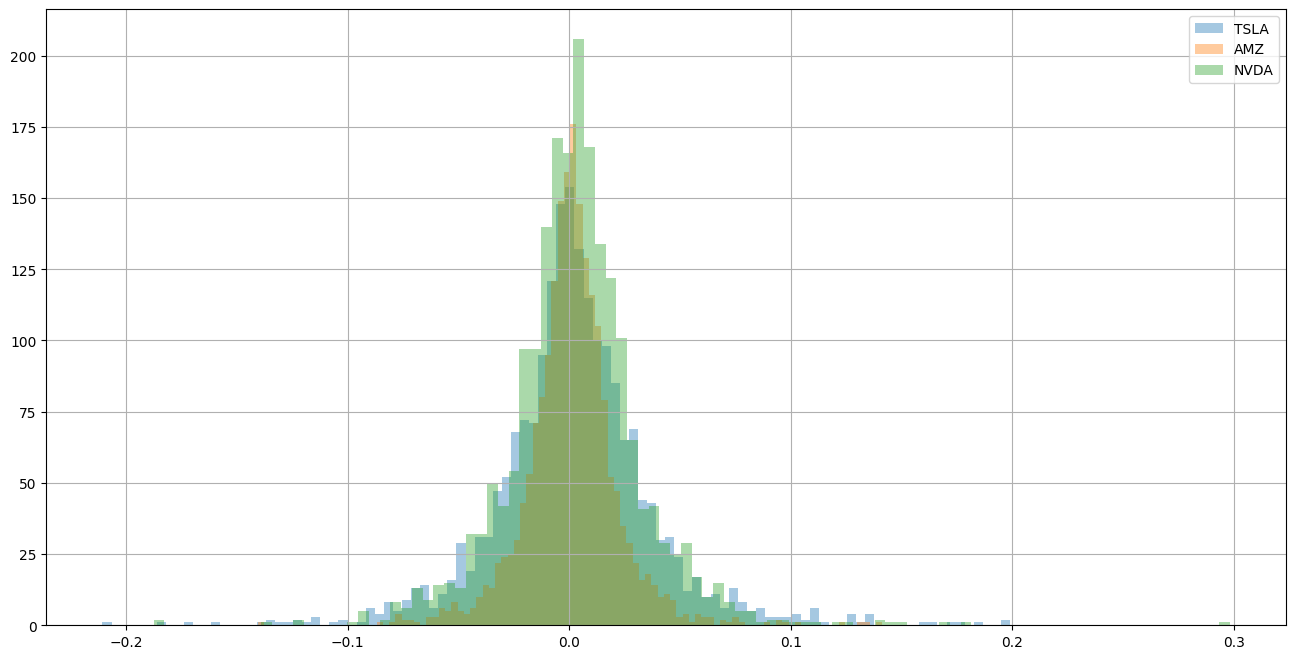

In [ ]:
# Interpretation selon les niveaux de volumetrie de nos Actifs: Actif qui ont un Grand Volume
Tesla.hist(bins=100, label = 'TSLA', figsize=(16,8), alpha=0.4)
Amaz.hist(bins=100, label = 'AMZ', figsize=(16,8), alpha=0.4)
Nvidia.hist(bins=100, label = 'NVDA', figsize=(16,8), alpha=0.4)
plt.legend();
# meme Interpretation que le cas precedent. a la seule difference que:
# Nvidia est l'actif avec le plus haut niveaux de rendement, mais les rendement positifs (+200) de Nvidia sont superieur aux rendements Negatifs (175)

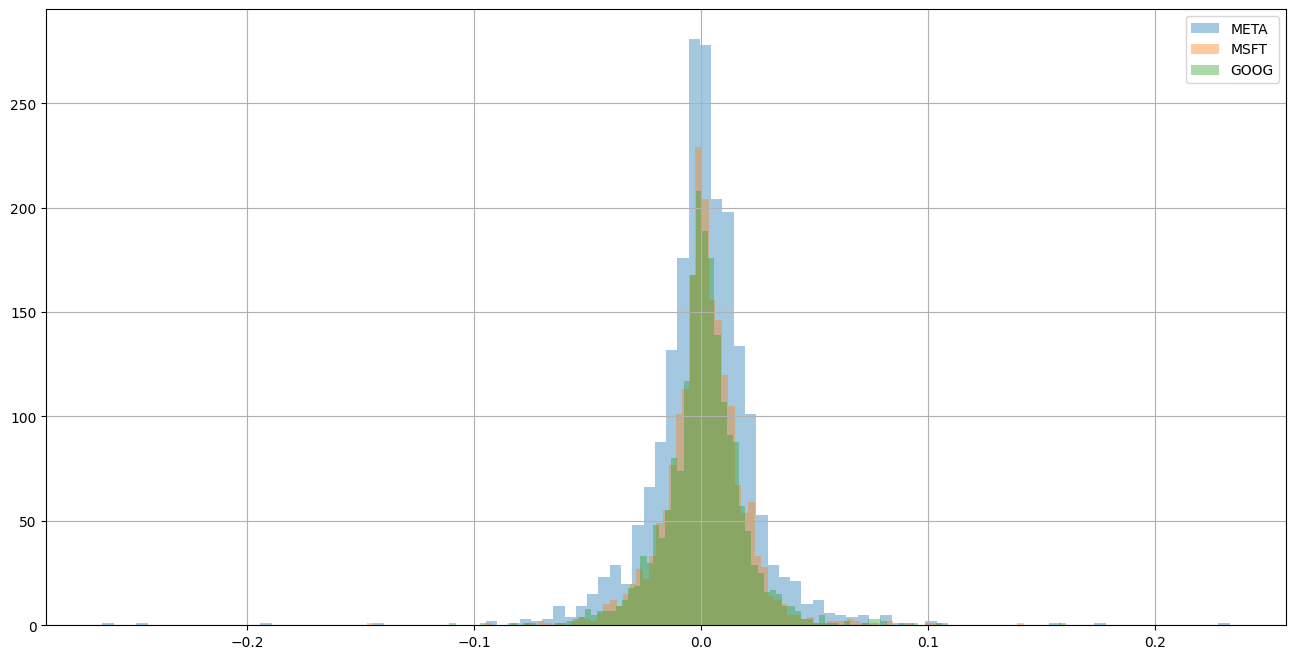

In [ ]:
# Interpretation selon les niveaux de volumetrie de nos Actifs: Actif qui ont un Volume Moyen
Meta.hist(bins=100, label = 'META', figsize=(16,8), alpha=0.4)
Microsoft.hist(bins=100, label = 'MSFT', figsize=(16,8), alpha=0.4)
Google.hist(bins=100, label = 'GOOG', figsize=(16,8), alpha=0.4)
plt.legend();
# Meta est l'actif avec le plus haut niveaux de rendement moyen positif et Negatif (+250)

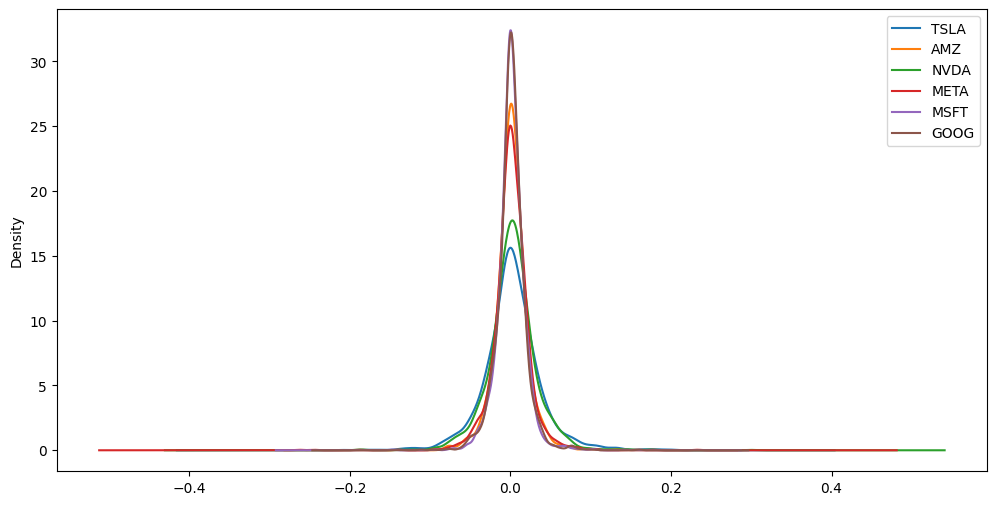

In [ ]:
# Estimation des Densités
Tesla.plot(kind='kde', label = 'TSLA', figsize=(12,6))
Amaz.plot(kind='kde', label = 'AMZ', figsize=(12,6))
Nvidia.plot(kind='kde', label = 'NVDA', figsize=(12,6))
Meta.plot(kind='kde', label = 'META', figsize=(12,6))
Microsoft.plot(kind='kde', label = 'MSFT', figsize=(12,6))
Google.plot(kind='kde', label = 'GOOG', figsize=(12,6))
plt.legend();

# Interpretation
# Google et MSFT se superposent et dominent tous les autres actifs en matiere de Fréquence et Niveau(positif, negatif) du rendement Moyen de nos actifs
# Tesla et Nvidia ont les plus grandes Frequences, mais sont deséquilibré sur le niveau qui peut etre plus positif que negatif et inversement

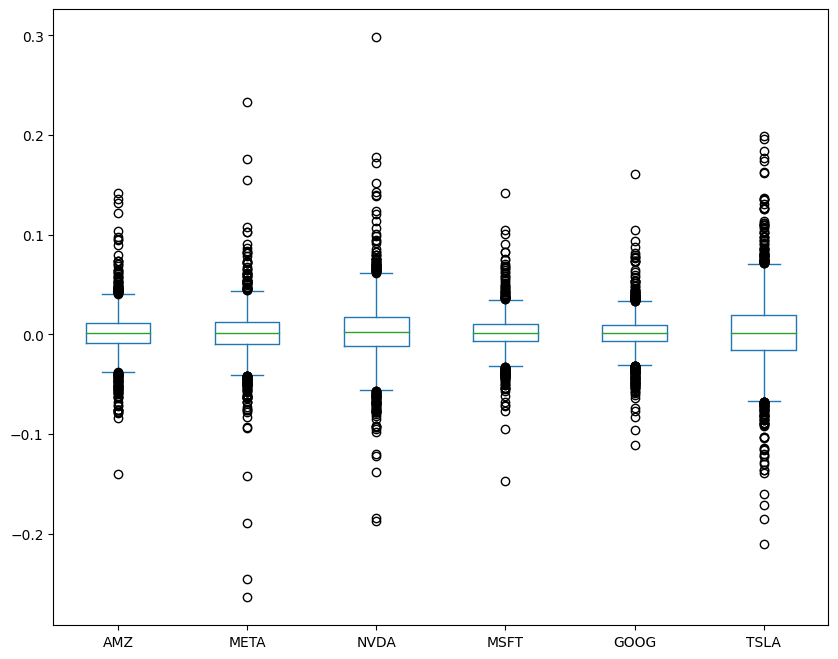

In [ ]:
#box plot
boxPlot = pd.concat([Amaz,Meta,Nvidia,Microsoft,Google,Tesla], axis=1)
boxPlot.columns= ['AMZ','META','NVDA','MSFT','GOOG','TSLA']
boxPlot.plot(kind='box',figsize=(10,8));

#Interpretation de l'analyse de Box plot bivariées

#	La médiane est unique (0) et le niveaux des quartiles (1er ,2e,3e,4e) est relatif au comportement de l’actif.
# Le corps des plots nous revelle que: -	Tesla possède le box le plus grand contrairement à google et Microsoft qui possèdent les plus petit et resserré.
# Les extremités (T) montrent que Tesla possède les plus grand rendement moyen par rapport aux autres actifs

# les bulles °°° representent les Outliers ou abérations qui peuvent etre interpreter comme suite:
  #Tesla possède de fortes et large variation du rendement, contrairement à Microsoft Où c’est très resserré
  #Ils montrent Meta possède des niveaux de rendement plus élevé que Tesla, et les espaces révèlent que les rendements de Tesla sont plus fréquents que celles de Meta
  #AMZ et Nvidia possède un nombre de rentabilités positif qui dépasse les rentabilités négatives
